In [1]:

import matplotlib.pyplot as plt
import numpy as np
import xlrd
from arch.bootstrap import SPA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model

In [88]:
def str_wt_stp_3(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > upper_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price :
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < lower_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price :
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    return profit_ts, buy_signal, sell_signal
def str_wt_stp_4(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > upper_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price and closing_prices[i] < lower_band[i]:
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < lower_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price and closing_prices[i] > upper_band[i]:
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    return profit_ts, buy_signal, sell_signal

def strategy_profit_with_stop_loss_2(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > mid_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price and closing_prices[i] < lower_band[i]:
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < mid_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price and closing_prices[i] > upper_band[i]:
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    return profit_ts, buy_signal, sell_signal


def strategy_profit_with_stop_loss_1(closing_prices, mid_band, lower_band, upper_band, stop_loss = 0.1):
    
    profit = 0
    buy_signal = []
    sell_signal = []
    position = None  # None means no position, 'long' means holding a long position
    entry_price = 0
    stop_loss_price = 0
    profit_ts = []
    for i in range(closing_prices.shape[0]):
        if position is None:
            if closing_prices[i] < lower_band[i]:
                position = 'long'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 - stop_loss)/ 100
                buy_signal.append(i)
            elif closing_prices[i] > upper_band[i]:
                position = 'short'
                entry_price = closing_prices[i]
                stop_loss_price = entry_price * (100 + stop_loss)/ 100
                sell_signal.append(i)
        elif position == 'long':
            if closing_prices[i] > mid_band[i]:
                profit += closing_prices[i] - entry_price
                position = None
                sell_signal.append(i)
            elif closing_prices[i] < stop_loss_price :
                profit -= entry_price - closing_prices[i]
                position = None
                sell_signal.append(i)
        elif position == 'short':
            if closing_prices[i] < mid_band[i]:
                profit += entry_price - closing_prices[i]
                position = None
                buy_signal.append(i)
            elif closing_prices[i] > stop_loss_price :
                profit -= closing_prices[i] - entry_price
                position = None
                buy_signal.append(i)

        profit_ts.append(profit)
    return profit_ts, buy_signal, sell_signal


In [61]:
# read from /home/vishi/bolinger/OHLC_New.csv
df = pd.read_csv('/home/vishi/bolinger/OHLC_New.csv', index_col='DateTime', parse_dates=True)
# remove close_scaled_down
df = df.drop(columns=['close_scaled_down'])
df.head()
# add rolling avg and sd
# ?round to 2 decimal places 

df['rolling_avg_15'] = df['close'].rolling(window=15).mean().round(2)  
df['rolling_sd_15'] = df['close'].rolling(window=15).std().round(2)  
df['rolling_avg_20'] = df['close'].rolling(window=20).mean().round(2)  
df['rolling_sd_20'] = df['close'].rolling(window=20).std().round(2)  

df.head()
# write the data into 15-7-25-nifty-bb.csv
df.to_csv('/home/vishi/bolinger/15-7-25-nifty-bb.csv', index=True)

In [91]:
mid_band = np.array(df['rolling_avg_20'])[20:]
upper_band = mid_band + 2 * np.array(df['rolling_sd_20'])[20:]
lower_band = mid_band - 2 * np.array(df['rolling_sd_20'])[20:]
close_band = np.array(df['close'])[20:]


# calculate the profit with stop loss of 100%
profit_ts_n_no, buy_signal_n_no, sell_signal_n_no = strategy_profit_with_stop_loss_2(close_band, mid_band, lower_band, upper_band, stop_loss=100)
profit_ts_n_1, buy_signal_n_1, sell_signal_n_1 = strategy_profit_with_stop_loss_2(close_band, mid_band, lower_band, upper_band, stop_loss=0.1)
profit_ts_e_no, buy_signal_e_no, sell_signal_e_no = str_wt_stp_3(close_band, mid_band, lower_band, upper_band, stop_loss=100)
profit_ts_e_1, buy_signal_e_1, sell_signal_e_1 = str_wt_stp_3(close_band, mid_band, lower_band, upper_band, stop_loss=0.5)
profit_ts_e2_no, buy_signal_e2_no, sell_signal_e2_no = str_wt_stp_4(close_band, mid_band, lower_band, upper_band, stop_loss=100)
profit_ts_e2_1, buy_signal_e2_1, sell_signal_e2_1 = str_wt_stp_4(close_band, mid_band, lower_band, upper_band, stop_loss=0.01)


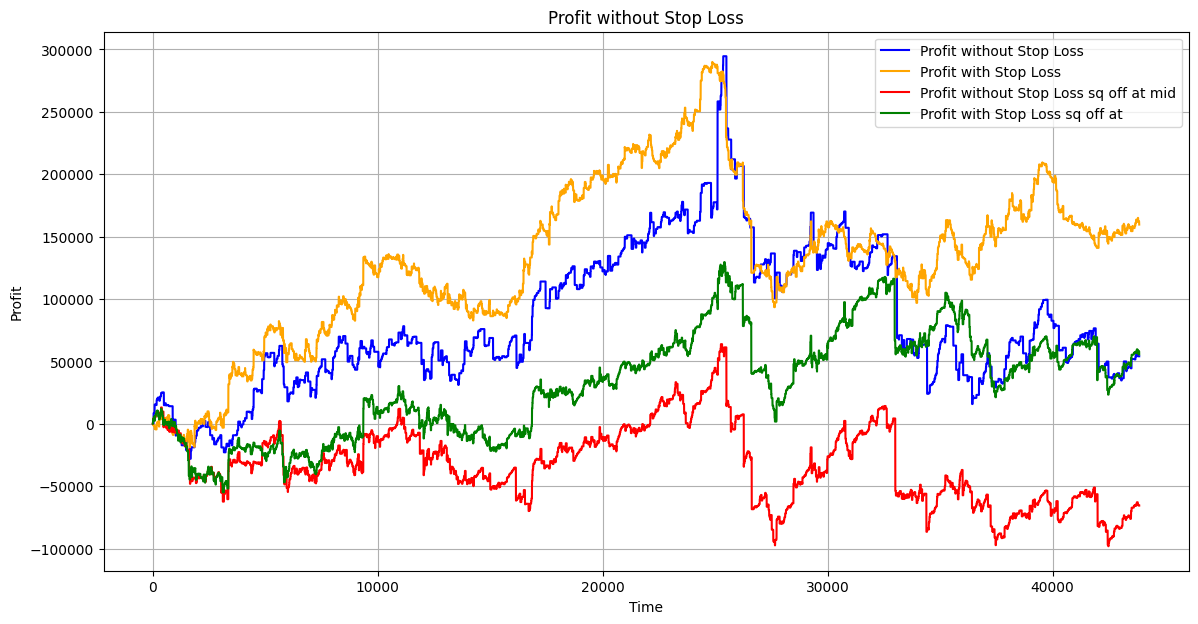

In [92]:

plt.figure(figsize=(14, 7))
plt.plot(profit_ts_e2_no, label='Profit without Stop Loss', color='blue')
plt.plot(profit_ts_e2_1, label='Profit with Stop Loss', color='orange')
plt.plot(profit_ts_n_no, label='Profit without Stop Loss sq off at mid', color='red')
plt.plot(profit_ts_n_1, label='Profit with Stop Loss sq off at ', color='green')
plt.title('Profit without Stop Loss')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()


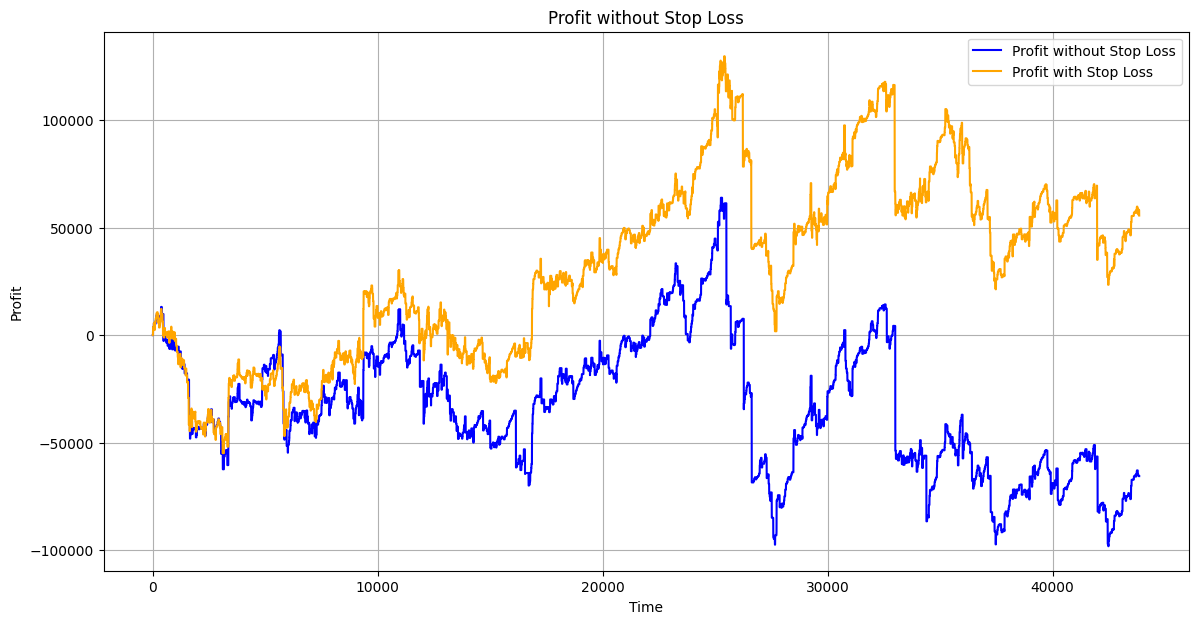

In [83]:
#\plot the profit_ts

plt.figure(figsize=(14, 7))
plt.plot(profit_ts_n_no, label='Profit without Stop Loss', color='blue')
plt.plot(profit_ts_n_1, label='Profit with Stop Loss', color='orange')
plt.title('Profit without Stop Loss')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()
